# **Installing Libraries (Optional)**

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install requests
# !pip install selenium
# !pip install webdriver-manager
# !pip install beautifulsoup4
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn
# !pip install nltk


#  **Import neccessery libraries**

In [44]:
import re
import pandas as pd
import numpy as np
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

from nltk.sentiment.vader import SentimentIntensityAnalyzer


#  **Web Scraping from Amazon website**

Since pulling the data from the site takes hours, we pulled the data once and exported it to a CSV file


In [ ]:
My_User_Agent  = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
headers = {
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': My_User_Agent,
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'referer': 'https://www.amazon.com/',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
}

options = webdriver.ChromeOptions()
options.add_argument("start-maximized")
options.add_argument("--log-level=3")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)
options.add_argument("--disable-blink-features=AutomationControlled")

# Driver Setting to notice. 
try:driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
except:driver = webdriver.Chrome()

# Looping Through Pages
listofdict = list()
Listing_count= 7000 
Listing_start = 1
Script_Break = False
Full_Break = False
pages = range(1,100)
for page in pages:
    if Full_Break == True:
        break

    driver.get('https://www.amazon.com/')
    time.sleep(2)
    Page_URL = f"https://www.amazon.com/s?i=electronics-intl-ship&bbn=16225009011&rh=n%3A16225009011%2Cn%3A541966&page={page}&qid=1709158259&ref=sr_pg_1"
    driver.get(Page_URL)
    time.sleep(3)

    response = driver.page_source
    soup = BeautifulSoup(response, "html.parser")

    Results = soup.find_all('div',class_='sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20')
    # Looping Through Each Product
    for data in Results:
        if Script_Break == True:
            Full_Break = True
            break

        try:
            Product_Link = data.find('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal').get('href')
            Full_Link = 'https://www.amazon.com' + Product_Link

            driver.get(Full_Link)
            time.sleep(2)

            Product_response = driver.page_source
            Product_Soup = BeautifulSoup(Product_response, "html.parser")

            #Getting Data 
            product_name = Product_Soup.find('span', id="productTitle").text.strip()
            product_price = Product_Soup.find('span', class_='aok-offscreen').text
            try:
                product_Description = Product_Soup.find('div', id='aplus').text.strip()
            except:
                product_Description = Product_Soup.find('div', id='apm-brand-story-carousel').text.strip()
            review_link = Product_Soup.find('a', class_='a-link-emphasis a-text-bold').get('href')
      
            review_url = 'https://www.amazon.com' + review_link
            driver.get(review_url)
            time.sleep(2)

            review_response = driver.page_source
            review_soup = BeautifulSoup(review_response, "html.parser")
            all_reviews = review_soup.find_all('div', class_='a-section review aok-relative')
            
            for review_data in all_reviews:
                datadict = dict()
                datadict['Product Name'] = product_name
                datadict['Product Price'] = product_price
                datadict['Product Description'] = product_Description
                datadict['Product ID'] = Full_Link.split('/')[5]
                datadict['Brand'] =review_soup.find('a', class_='a-size-base a-link-normal').text
                datadict['Rating'] =review_data.find('span', class_='a-icon-alt').text.split(' ')[0]
                datadict['Date'] =review_data.find('span', class_='a-size-base a-color-secondary review-date').text.split(' on ')[1]
                datadict['customer reviews'] =review_data.find('span', class_='a-size-base review-text review-text-content').text.strip()
                print(datadict)
                listofdict.append(datadict)
                print('Listing Number......', Listing_start)
                if Listing_start >= Listing_count:
                    Script_Break = True
                    break
                Listing_start = Listing_start+1
        except:
            pass

df = pd.DataFrame.from_dict(listofdict)
path = 'Amazon_Data.csv'
df.to_csv(path ,index=False)
print(f'Data Saved in {path}')


# Data Loading and Preprocessing



Reading data from CSV file and making a DataFrame df from it.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_Data.csv')
df.head()

,Product Name,Product Price,Product Description,Product ID,Brand,Rating,Date,customer reviews
0,Amazon Basics Micro SDXC Memory Card with Full...,$17.92,From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...,B08TJRVWV1,Amazon Basics,5.0,"December 15, 2023",n a world obsessed with flashy brands and exor...
1,Amazon Basics Micro SDXC Memory Card with Full...,$17.92,From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...,B08TJRVWV1,Amazon Basics,5.0,"February 8, 2024",Plenty of room and works and great price. No i...
2,Amazon Basics Micro SDXC Memory Card with Full...,$17.92,From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...,B08TJRVWV1,Amazon Basics,5.0,"January 6, 2024",Works really well. I use it for my dash cam an...
3,Amazon Basics Micro SDXC Memory Card with Full...,$17.92,From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...,B08TJRVWV1,Amazon Basics,4.0,"May 1, 2023",The Amazon Basics microSDXC Memory Card with F...
4,Amazon Basics Micro SDXC Memory Card with Full...,$17.92,From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...,B08TJRVWV1,Amazon Basics,5.0,"February 25, 2024","Nice card good for security cameras , adapters..."


Dropping Null Values rows

*   Dropping Date column as its not Relevant
*   Removing new line variable from Product Description
*   Removing dollar sign from Product Price
*   Converting Product Price from string to integer
*   Dropping Null Values rows after processing
*   Dropping Product Description

---




In [3]:
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Product Description', axis=1, inplace=True)
df['Product Price'] = df['Product Price'].str.replace('$', '')
df['Product Price'] = df['Product Price'].apply(lambda x: re.findall(r'\d+\.\d+', str(x)))
df['Product Price'] = df['Product Price'].apply(lambda x: float(x[0]) if len(x) > 0 else None)
df.dropna(inplace=True)
df

<ipython-input-3-ad3c8f237d9e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Product Price'] = df['Product Price'].str.replace('$', '')


,Product Name,Product Price,Product ID,Brand,Rating,customer reviews
0,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...
1,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Plenty of room and works and great price. No i...
2,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Works really well. I use it for my dash cam an...
3,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...
4,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,"Nice card good for security cameras , adapters..."
...,...,...,...,...,...,...
6995,be quiet! Dark Rock Pro 4 250W TDP CPU Cooler ...,91.99,B07BY6F8D9,be quiet!,3.0,"So first thing first, I am leaving the review ..."
6996,be quiet! Dark Rock Pro 4 250W TDP CPU Cooler ...,91.99,B07BY6F8D9,be quiet!,5.0,Purchased this for use with an ASUS Rog Strix ...
6997,LG Electronics BP60NB10 Ultra Slim Portable Hy...,129.99,B079LTC6ML,LG Electronics,5.0,"When I received the drive today, there was no ..."
6998,LG Electronics BP60NB10 Ultra Slim Portable Hy...,129.99,B079LTC6ML,LG Electronics,5.0,When I am not traveling it is used like any ot...


Visualizing Brand percentage and their weithage in dataset

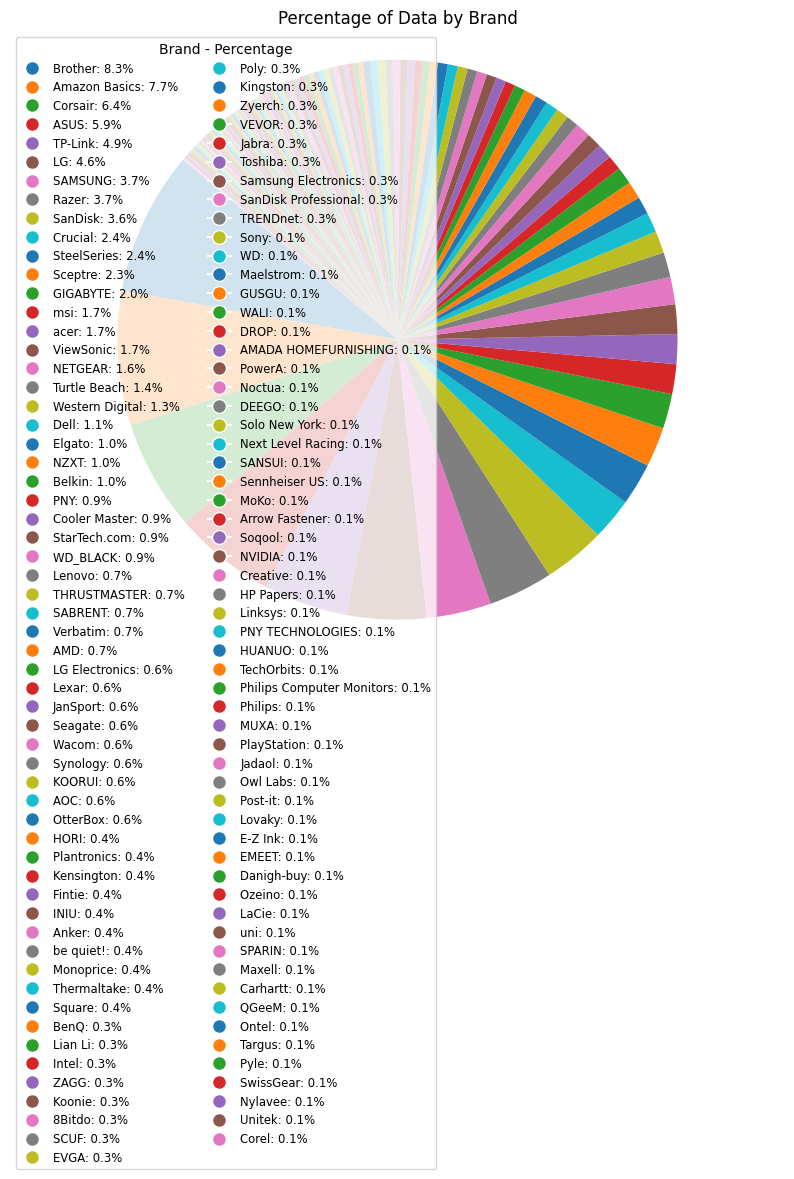

In [4]:
brand_counts = df['Brand'].value_counts()
percentages = brand_counts / len(df) * 100
plt.figure(figsize=(10, 8))
patches, _ = plt.pie(brand_counts, startangle=140)
plt.title('Percentage of Data by Brand')
plt.axis('equal')
legend_labels = [f'{brand}: {percent:.1f}%' for brand, percent in zip(brand_counts.index, percentages)]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}', markersize=10) for i in range(len(brand_counts))]
plt.legend(legend_handles, legend_labels, loc='upper left', fontsize='small', title='Brand - Percentage', ncol=2)
plt.show()

In [5]:
df.head()

,Product Name,Product Price,Product ID,Brand,Rating,customer reviews
0,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...
1,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Plenty of room and works and great price. No i...
2,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Works really well. I use it for my dash cam an...
3,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...
4,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,"Nice card good for security cameras , adapters..."


Visualizing Relationship Between Brand and Rating

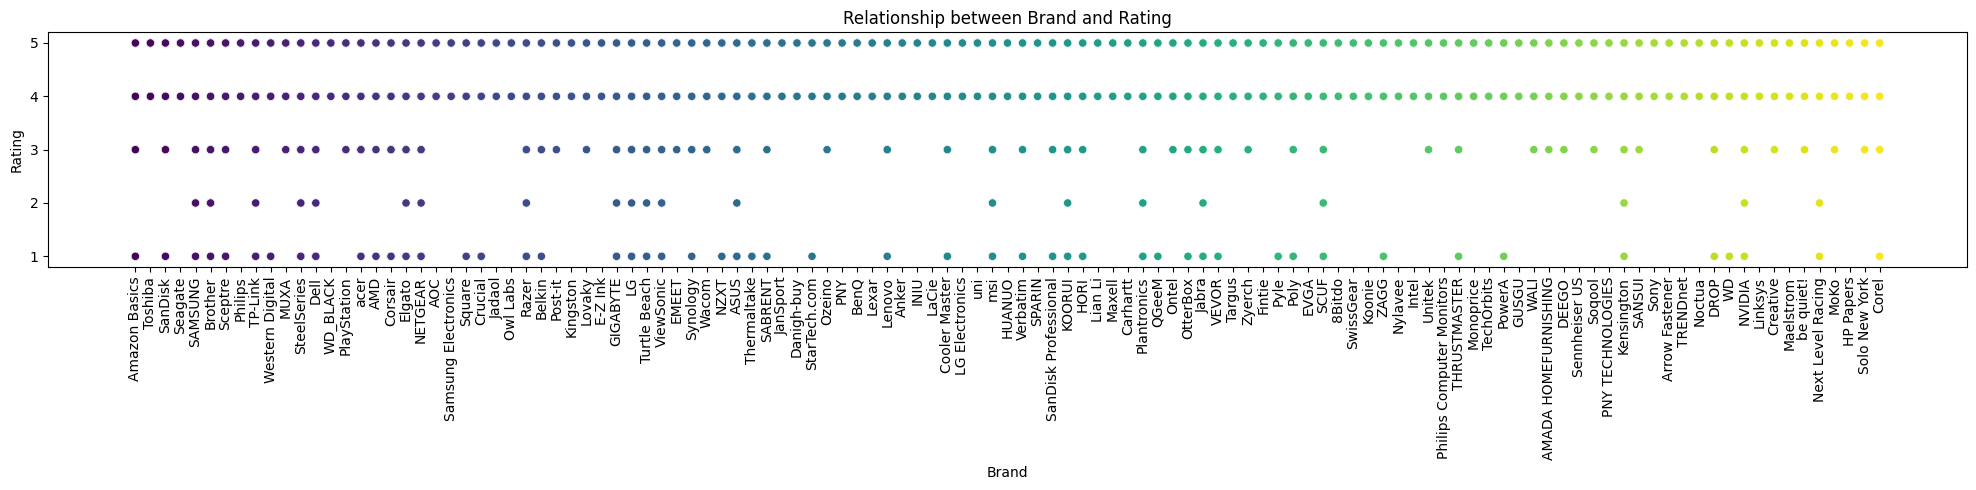

In [6]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Brand', y='Rating', hue='Brand', data=df, palette='viridis', legend=False)
plt.title('Relationship between Brand and Rating')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Applying nltk to get useful words from reviews and remove all useless words

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.notnull(text):
        words = word_tokenize(str(text).lower())
        words = [word for word in words if word.isalpha() and word not in stop_words]
        words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(words)
    else:
        return ''
df['clean_reviews'] = df['customer reviews'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Product Name,Product Price,Product ID,Brand,Rating,customer reviews,clean_reviews
0,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...,n world obsessed flashy brand exorbitant price...
1,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Plenty of room and works and great price. No i...,plenty room work great price issue
2,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,Works really well. I use it for my dash cam an...,work really well use dash cam problem good pri...
3,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...,amazon basic microsdxc memory card full size a...
4,Amazon Basics Micro SDXC Memory Card with Full...,17.92,B08TJRVWV1,Amazon Basics,5.0,"Nice card good for security cameras , adapters...",nice card good security camera adapter work great
...,...,...,...,...,...,...,...
6995,be quiet! Dark Rock Pro 4 250W TDP CPU Cooler ...,91.99,B07BY6F8D9,be quiet!,3.0,"So first thing first, I am leaving the review ...",first thing first leaving review bequiet dark ...
6996,be quiet! Dark Rock Pro 4 250W TDP CPU Cooler ...,91.99,B07BY6F8D9,be quiet!,5.0,Purchased this for use with an ASUS Rog Strix ...,purchased use asus rog strix motherboard amd c...
6997,LG Electronics BP60NB10 Ultra Slim Portable Hy...,129.99,B079LTC6ML,LG Electronics,5.0,"When I received the drive today, there was no ...",received drive today surrounding box cushionin...
6998,LG Electronics BP60NB10 Ultra Slim Portable Hy...,129.99,B079LTC6ML,LG Electronics,5.0,When I am not traveling it is used like any ot...,traveling used like drive video editing disc b...


Applying TF-IDF method on


*   clean_reivews
*   Product Name

to convert Text base data to meaningfull infromation



In [8]:
vectorizer = TfidfVectorizer()
text_col = ['clean_reviews','Product Name']
for col in text_col:
  X = vectorizer.fit_transform(df[col])
  tfidf_sum = X.sum(axis=1)
  df[col] = tfidf_sum
df

,Product Name,Product Price,Product ID,Brand,Rating,customer reviews,clean_reviews
0,4.324424,17.92,B08TJRVWV1,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...,11.454248
1,4.324424,17.92,B08TJRVWV1,Amazon Basics,5.0,Plenty of room and works and great price. No i...,2.346163
2,4.324424,17.92,B08TJRVWV1,Amazon Basics,5.0,Works really well. I use it for my dash cam an...,4.394686
3,4.324424,17.92,B08TJRVWV1,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...,7.200007
4,4.324424,17.92,B08TJRVWV1,Amazon Basics,5.0,"Nice card good for security cameras , adapters...",2.690539
...,...,...,...,...,...,...,...
6995,5.258003,91.99,B07BY6F8D9,be quiet!,3.0,"So first thing first, I am leaving the review ...",12.104805
6996,5.258003,91.99,B07BY6F8D9,be quiet!,5.0,Purchased this for use with an ASUS Rog Strix ...,8.884165
6997,4.927637,129.99,B079LTC6ML,LG Electronics,5.0,"When I received the drive today, there was no ...",8.610333
6998,4.927637,129.99,B079LTC6ML,LG Electronics,5.0,When I am not traveling it is used like any ot...,5.724546


Performing Sentiment analysis on the bases of rating and sentiment analyzer

In [9]:
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text, rating):
    if rating > 3:
        return 'Positive'
    elif rating < 3:
        return 'Negative'
    else:
        sentiment = analyzer.polarity_scores(text)
        if sentiment['compound'] >= 0.05:
            return 'Positive'
        elif sentiment['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
df['sentiment'] = df.apply(lambda row: get_sentiment_score(row['customer reviews'], row['Rating']), axis=1)
df[['Product Name', 'Rating', 'customer reviews', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Product Name,Rating,customer reviews,sentiment
0,4.324424,5.0,n a world obsessed with flashy brands and exor...,Positive
1,4.324424,5.0,Plenty of room and works and great price. No i...,Positive
2,4.324424,5.0,Works really well. I use it for my dash cam an...,Positive
3,4.324424,4.0,The Amazon Basics microSDXC Memory Card with F...,Positive
4,4.324424,5.0,"Nice card good for security cameras , adapters...",Positive
...,...,...,...,...
6995,5.258003,3.0,"So first thing first, I am leaving the review ...",Negative
6996,5.258003,5.0,Purchased this for use with an ASUS Rog Strix ...,Positive
6997,4.927637,5.0,"When I received the drive today, there was no ...",Positive
6998,4.927637,5.0,When I am not traveling it is used like any ot...,Positive


Applying Label Encoding on

* Brand
* Product ID
* Sentiment

In [10]:
brand_encoder = LabelEncoder()
df['Brand_encode'] = brand_encoder.fit_transform(df['Brand'])
product_id_encoder = LabelEncoder()
df['Product ID'] = product_id_encoder.fit_transform(df['Product ID'])
df.head()
df['sentiment_encoded'] = product_id_encoder.fit_transform(df['sentiment'])
df.head()


,Product Name,Product Price,Product ID,Brand,Rating,customer reviews,clean_reviews,sentiment,Brand_encode,sentiment_encoded
0,4.324424,17.92,356,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...,11.454248,Positive,5,2
1,4.324424,17.92,356,Amazon Basics,5.0,Plenty of room and works and great price. No i...,2.346163,Positive,5,2
2,4.324424,17.92,356,Amazon Basics,5.0,Works really well. I use it for my dash cam an...,4.394686,Positive,5,2
3,4.324424,17.92,356,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...,7.200007,Positive,5,2
4,4.324424,17.92,356,Amazon Basics,5.0,"Nice card good for security cameras , adapters...",2.690539,Positive,5,2


Printing First 5 rows data from processed data set

In [11]:
df.head(5)

,Product Name,Product Price,Product ID,Brand,Rating,customer reviews,clean_reviews,sentiment,Brand_encode,sentiment_encoded
0,4.324424,17.92,356,Amazon Basics,5.0,n a world obsessed with flashy brands and exor...,11.454248,Positive,5,2
1,4.324424,17.92,356,Amazon Basics,5.0,Plenty of room and works and great price. No i...,2.346163,Positive,5,2
2,4.324424,17.92,356,Amazon Basics,5.0,Works really well. I use it for my dash cam an...,4.394686,Positive,5,2
3,4.324424,17.92,356,Amazon Basics,4.0,The Amazon Basics microSDXC Memory Card with F...,7.200007,Positive,5,2
4,4.324424,17.92,356,Amazon Basics,5.0,"Nice card good for security cameras , adapters...",2.690539,Positive,5,2


Visulizing Distribution of each column on processed data

* using for loop to iterate thorugh columns and visulizing plot for all

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


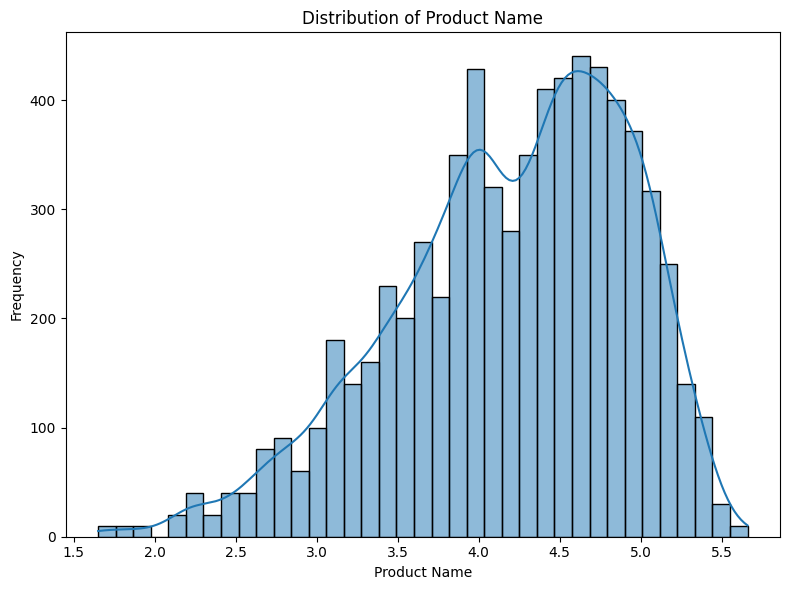

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


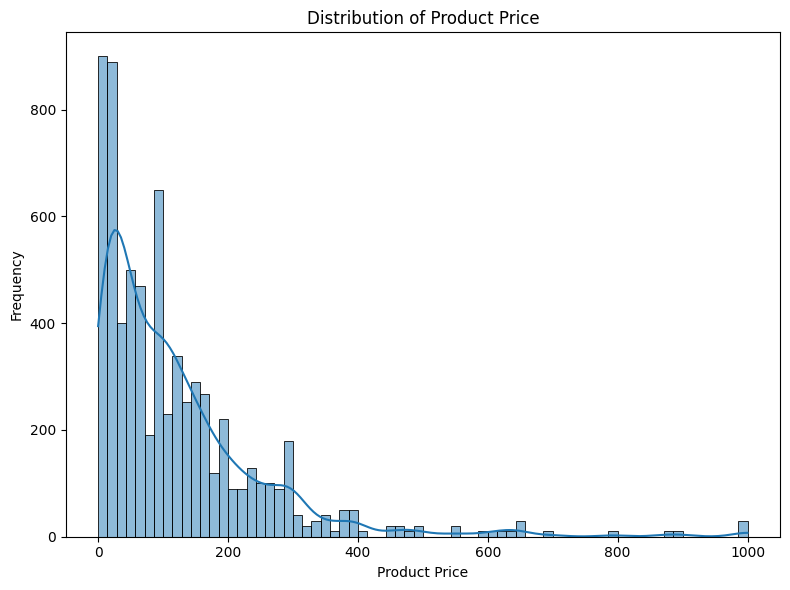

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


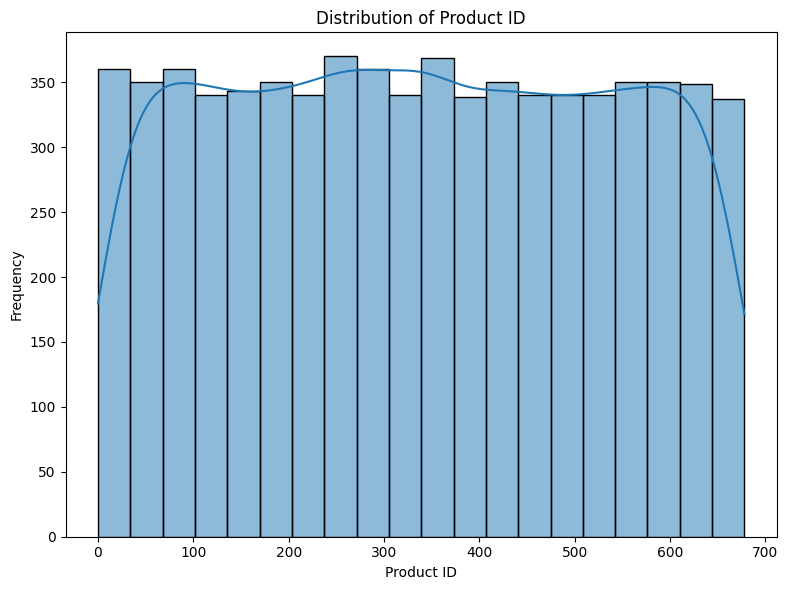

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


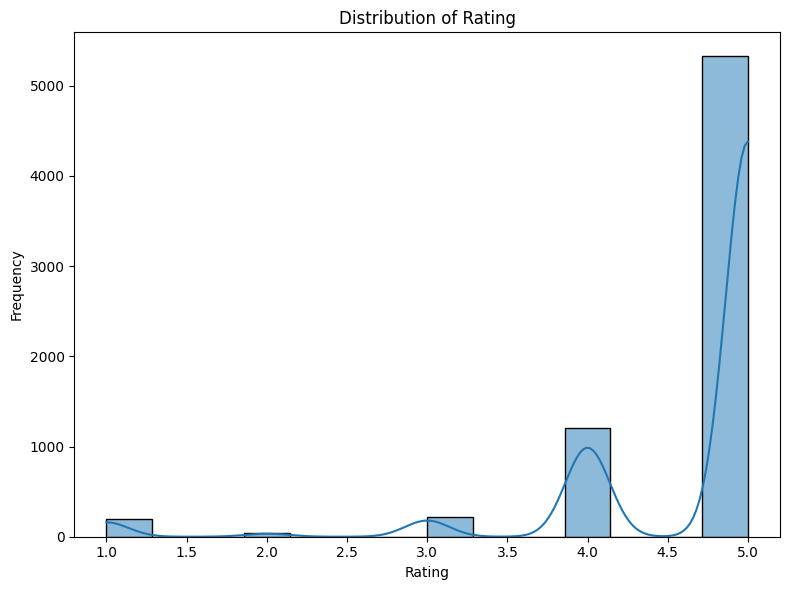

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


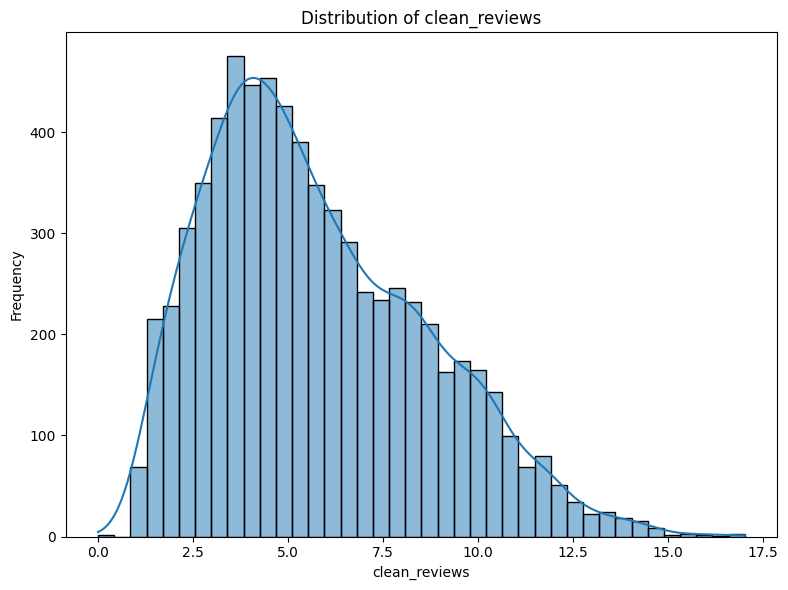

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


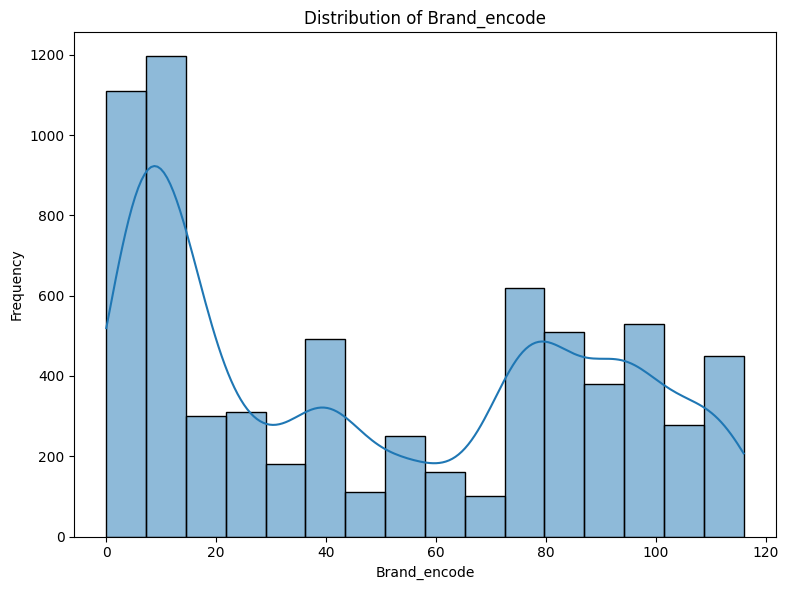

<ipython-input-12-7a05b971ded0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


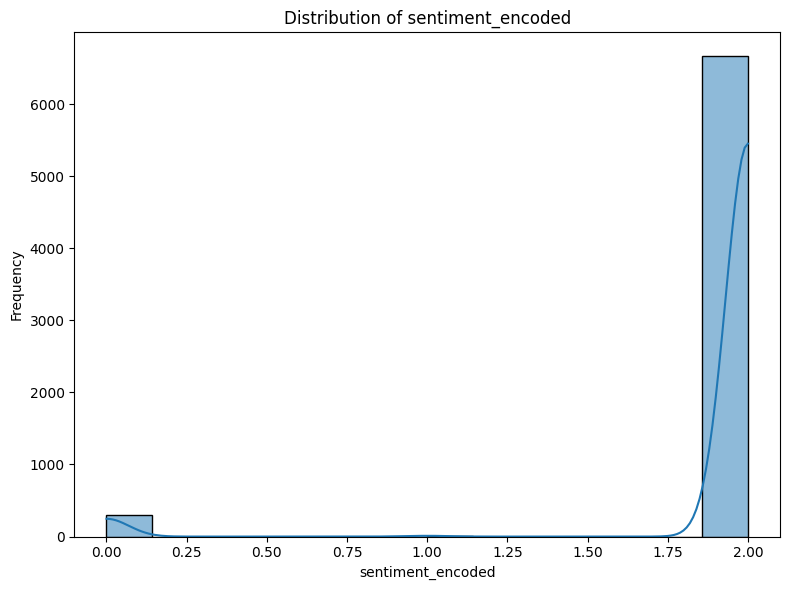

In [12]:
df.drop('customer reviews', axis=1, inplace=True)
x = 'sentiment'
y = 'Brand'
for col in df.columns:
  if col != x and col != y :
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True,palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



---



---



In [13]:
numerical_columns = ['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,Product Name,Product Price,Product ID,Brand,Rating,clean_reviews,sentiment,Brand_encode,sentiment_encoded
0,0.170316,17.92,0.096136,Amazon Basics,0.446112,1.996340,Positive,-1.175276,0.216282
1,0.170316,17.92,0.096136,Amazon Basics,0.446112,-1.188474,Positive,-1.175276,0.216282
2,0.170316,17.92,0.096136,Amazon Basics,0.446112,-0.472169,Positive,-1.175276,0.216282
3,0.170316,17.92,0.096136,Amazon Basics,-0.783162,0.508764,Positive,-1.175276,0.216282
4,0.170316,17.92,0.096136,Amazon Basics,0.446112,-1.068056,Positive,-1.175276,0.216282
...,...,...,...,...,...,...,...,...,...
6995,1.453418,91.99,-0.961729,be quiet!,-2.012437,2.223820,Negative,1.689460,-4.675125
6996,1.453418,91.99,-0.961729,be quiet!,0.446112,1.097662,Positive,1.689460,0.216282
6997,0.999366,129.99,-0.982171,LG Electronics,0.446112,1.001912,Positive,-0.229124,0.216282
6998,0.999366,129.99,-0.982171,LG Electronics,0.446112,-0.007158,Positive,-0.229124,0.216282


Copying processed data frame to original data set later use for cluster name shwoing and grouping

In [14]:
original = df.copy()
original

,Product Name,Product Price,Product ID,Brand,Rating,clean_reviews,sentiment,Brand_encode,sentiment_encoded
0,0.170316,17.92,0.096136,Amazon Basics,0.446112,1.996340,Positive,-1.175276,0.216282
1,0.170316,17.92,0.096136,Amazon Basics,0.446112,-1.188474,Positive,-1.175276,0.216282
2,0.170316,17.92,0.096136,Amazon Basics,0.446112,-0.472169,Positive,-1.175276,0.216282
3,0.170316,17.92,0.096136,Amazon Basics,-0.783162,0.508764,Positive,-1.175276,0.216282
4,0.170316,17.92,0.096136,Amazon Basics,0.446112,-1.068056,Positive,-1.175276,0.216282
...,...,...,...,...,...,...,...,...,...
6995,1.453418,91.99,-0.961729,be quiet!,-2.012437,2.223820,Negative,1.689460,-4.675125
6996,1.453418,91.99,-0.961729,be quiet!,0.446112,1.097662,Positive,1.689460,0.216282
6997,0.999366,129.99,-0.982171,LG Electronics,0.446112,1.001912,Positive,-0.229124,0.216282
6998,0.999366,129.99,-0.982171,LG Electronics,0.446112,-0.007158,Positive,-0.229124,0.216282



# **K-Mean Clustering**

Choosing Best Number of clusters via Elbow method, Silhouette Score Method and Inertia Method


*   Dropping Product ID and applying PCA to reduce Data Dimension and then building K-mean Algorithm



Elbow Method
* Before that dropping text base column which are sentiment, Brand, Product Price

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

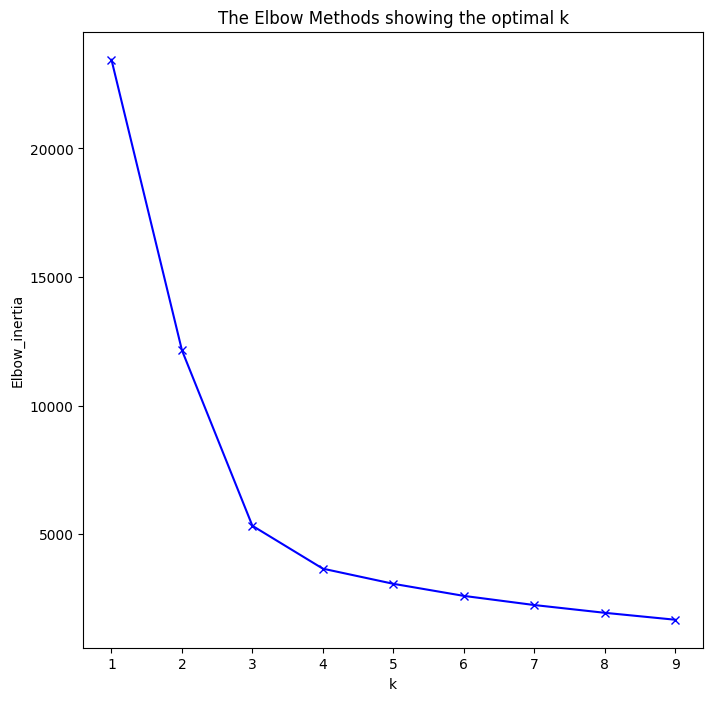

The optimal number of clusters according to the Elbow method is 3


In [15]:
df.drop('sentiment', axis=1, inplace=True)
df.drop('Product Price', axis=1, inplace=True)
df.drop('Brand', axis=1, inplace=True)
pca = PCA(n_components=2)


df_pca = pca.fit_transform(df[['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']])
inertia = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Elbow_inertia')
plt.title('The Elbow Methods showing the optimal k')
plt.show()
diff = np.diff(inertia)
diff_r = diff[1:] / diff[:-1]
k_opt_elbow = K[np.argmin(diff_r)+1]
print(f"The optimal number of clusters according to the Elbow method is {k_opt_elbow}")

Silhouette Score Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

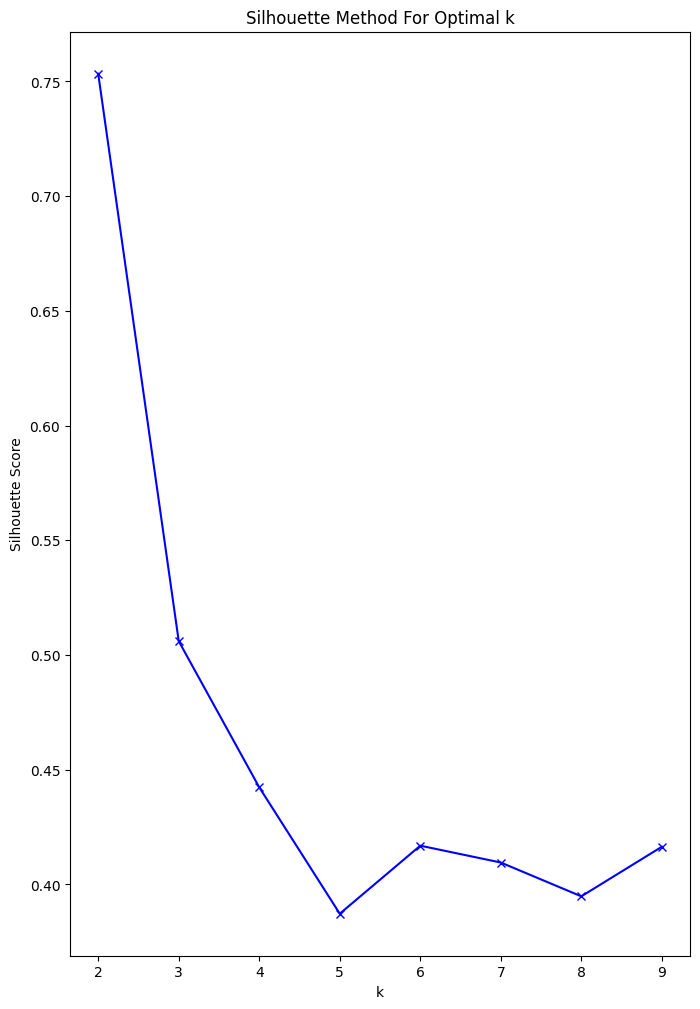

The optimal number of clusters is 2


In [16]:
sil = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df_pca)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_pca, labels, metric = 'euclidean'))
plt.figure(figsize=(8,12))
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()
k_opt = K[sil.index(max(sil))]
print(f"The optimal number of clusters is {k_opt}")

So after checking the silhoutte score and elbow method lets try K-mean with 2 cluster and with 3 cluster

Inetia Methos to Find Optimal Number of CLuster for

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

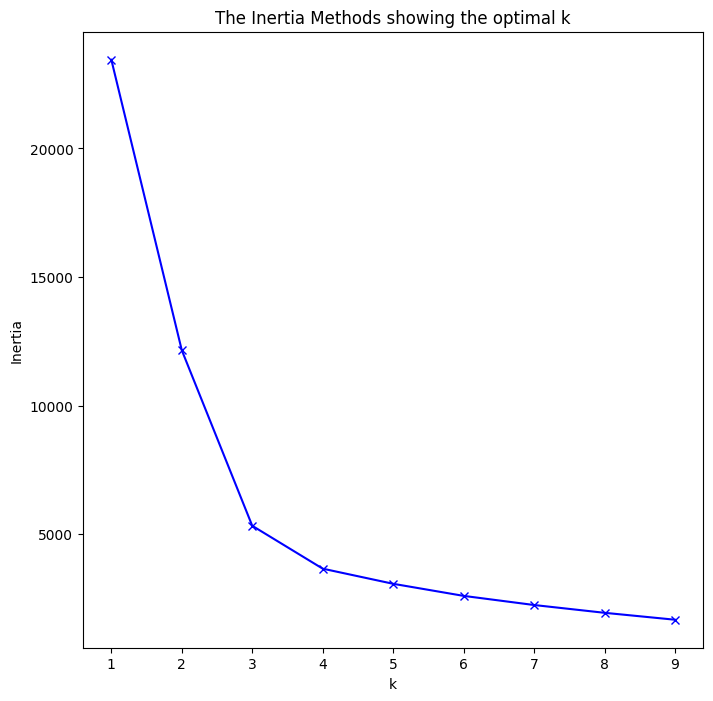

The optimal number of clusters according to the Inertia method is 9


In [17]:
inertia = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Inertia Methods showing the optimal k')
plt.show()
diff = np.diff(inertia)
diff_r = diff[1:] / diff[:-1]
k_opt_inertia = K[np.argmin(inertia)]
print(f"The optimal number of clusters according to the Inertia method is {k_opt_inertia}")

Training K mean on lcsuter range from 2 to 7

In [18]:

kmeans_models = {}
silhouette_scores = {}

for i in range(2, 8):  # 2 to 7 clusters
    kmeans = KMeans(n_clusters=i, random_state=45)
    kmeans.fit(df_pca)
    df[f'Cluster_{i}'] = kmeans.labels_
    kmeans_models[i] = kmeans
    silhouette_scores[i] = silhouette_score(df_pca, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

silhouette score to check how well seperated cluster are the higher the score
is the better the clusters are range between **(-1 -> 1)**


*   Checking Score on all generated k-mean cluster





In [19]:
for clusters, score in silhouette_scores.items():
    print(f"The silhouette score for {clusters} clusters is {score}")

The silhouette score for 2 clusters is 0.7533675065643806
The silhouette score for 3 clusters is 0.5058469144981231
The silhouette score for 4 clusters is 0.4422044960948555
The silhouette score for 5 clusters is 0.38665370502539176
The silhouette score for 6 clusters is 0.4156160300443987
The silhouette score for 7 clusters is 0.4125214519842447


Visualizing the cluster comparing Kmean with different cluster number
showing the count of data point in clusters


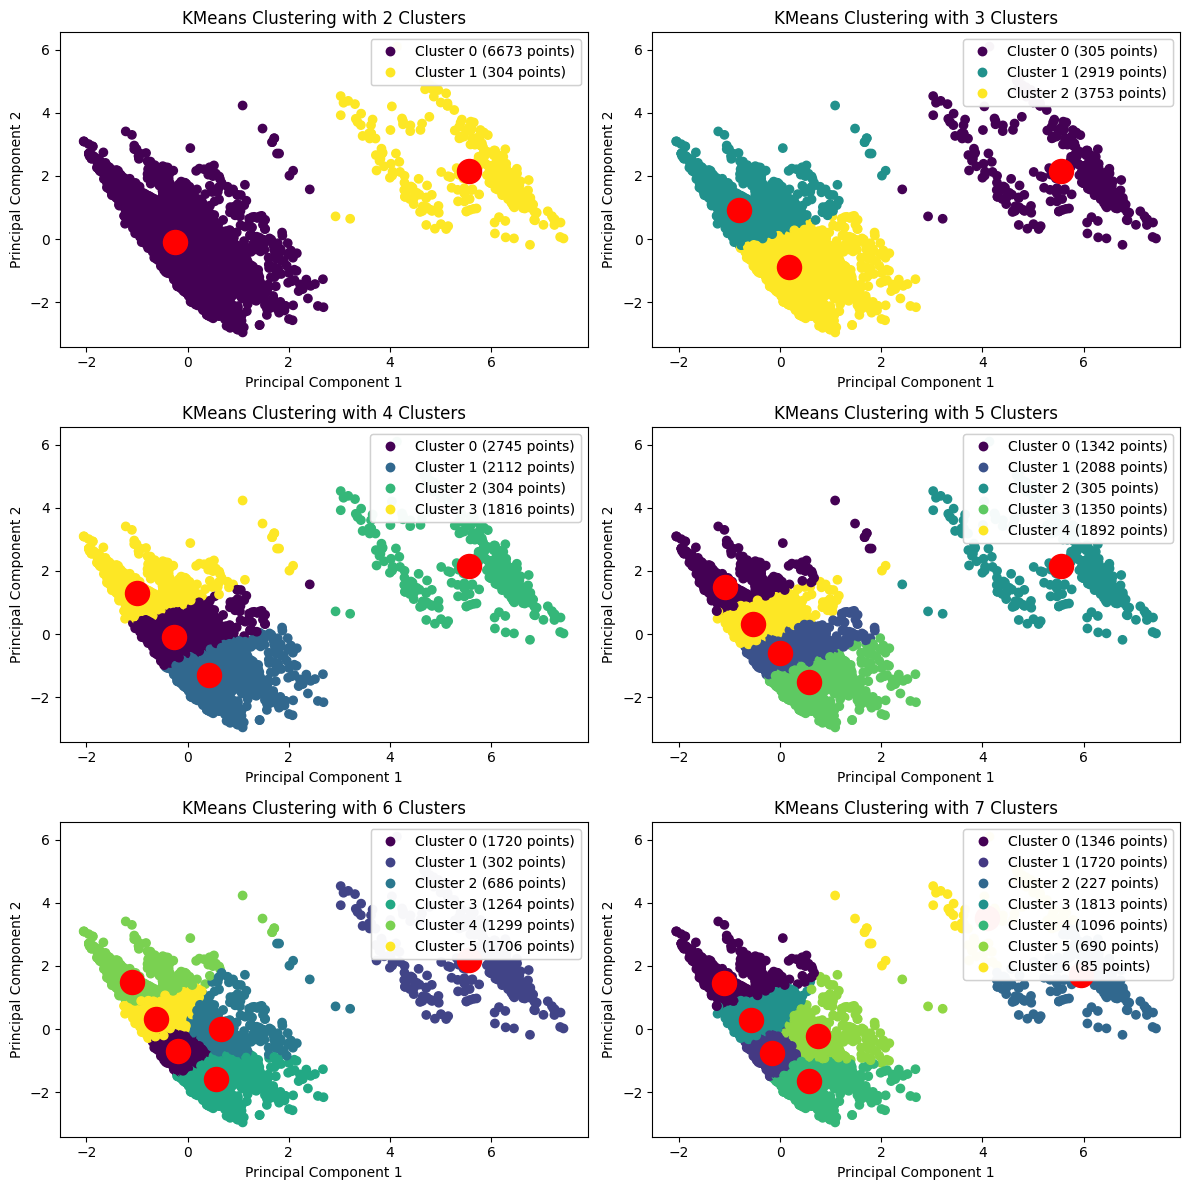

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
titles = ['2 Clusters', '3 Clusters', '4 Clusters', '5 Clusters', '6 Clusters', '7 Clusters']

for i, (k, kmeans) in enumerate(kmeans_models.items()):
    row = i // 2
    col = i % 2
    df[f'Cluster_{k}'] = kmeans.labels_
    cluster_counts = df[f'Cluster_{k}'].value_counts().sort_index()
    scatter = axs[row, col].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    axs[row, col].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
    legend = axs[row, col].legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i} ({count} points)' for i, count in enumerate(cluster_counts)], loc='upper right')
    axs[row, col].add_artist(legend)
    axs[row, col].set_title(f'KMeans Clustering with {titles[i]}')
    axs[row, col].set_xlabel('Principal Component 1')
    axs[row, col].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

as we can see the maximum score is at 2 k=2 clusters, lets try by visualizing these seperate Kmean plot for analysis

Cluster with Highest Silhoutte Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


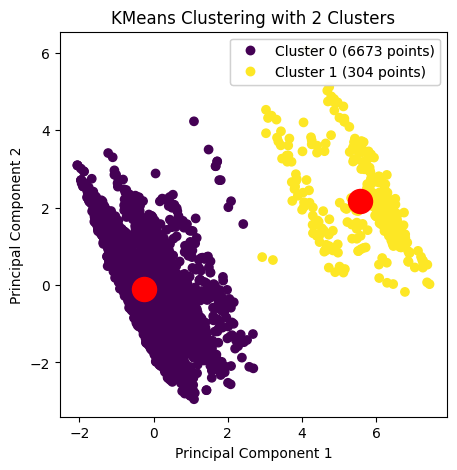

In [21]:
plt.figure(figsize=(5, 5))
kmeans = KMeans(n_clusters=2, random_state=45)
kmeans.fit(df_pca)
df[f'Cluster_{i}'] = kmeans.labels_
kmeans_models[i] = kmeans
df['Cluster'] = kmeans.labels_
cluster_counts = df['Cluster'].value_counts().sort_index()
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
legend = plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i} ({count} points)' for i, count in enumerate(cluster_counts)], loc='upper right')
plt.gca().add_artist(legend)
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




---



---



# **DBSCAN Clustering**

Finding the Optimal Eps for DBSCAN Training

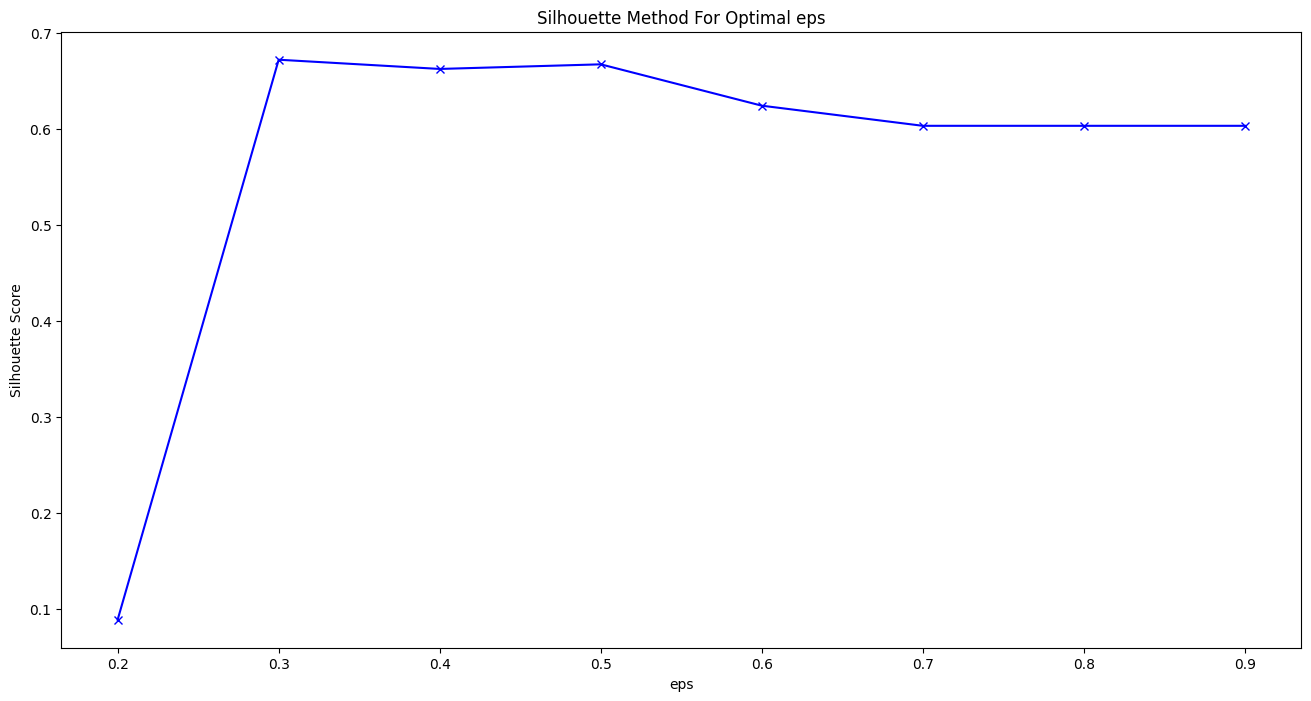

The best eps is 0.30000000000000004


In [22]:
sil = []
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']])
eps_values = np.arange(0.2, 1.0, 0.1)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10).fit(df_pca)
    labels = dbscan.labels_
    if len(set(labels)) > 1:
        sil.append(silhouette_score(df_pca, labels, metric='euclidean'))
    else:
        sil.append(-1)
plt.figure(figsize=(16,8))
plt.plot(eps_values, sil, 'bx-')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal eps')
plt.show()
eps_best = eps_values[sil.index(max(sil))]
print(f"The best eps is {eps_best}")

Training model on range of Eps range from 0.2 to 4.5 with step 0.5

In [23]:
eps_values = np.arange(0.2, 1.0, 0.1)
dbscan_models = []
sil_hou = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(df_pca)
    dbscan_models.append(dbscan)

Printing Score for each model

In [24]:
for i, dbscan in enumerate(dbscan_models):
    if len(set(dbscan.labels_)) > 1:
        sil_score = silhouette_score(df_pca, dbscan.labels_)
        print(f'Silhouette Score with eps={eps_values[i]}: {sil_score}')

Silhouette Score with eps=0.2: 0.08866924117439155
Silhouette Score with eps=0.30000000000000004: 0.6725013703287542
Silhouette Score with eps=0.4000000000000001: 0.6628911740421094
Silhouette Score with eps=0.5000000000000001: 0.667701961592939
Silhouette Score with eps=0.6000000000000001: 0.6245854332917581
Silhouette Score with eps=0.7000000000000002: 0.6036027144523164
Silhouette Score with eps=0.8000000000000003: 0.6036027144523164
Silhouette Score with eps=0.9000000000000001: 0.6036027144523164


Visulizing the Graph so we can get see the difference

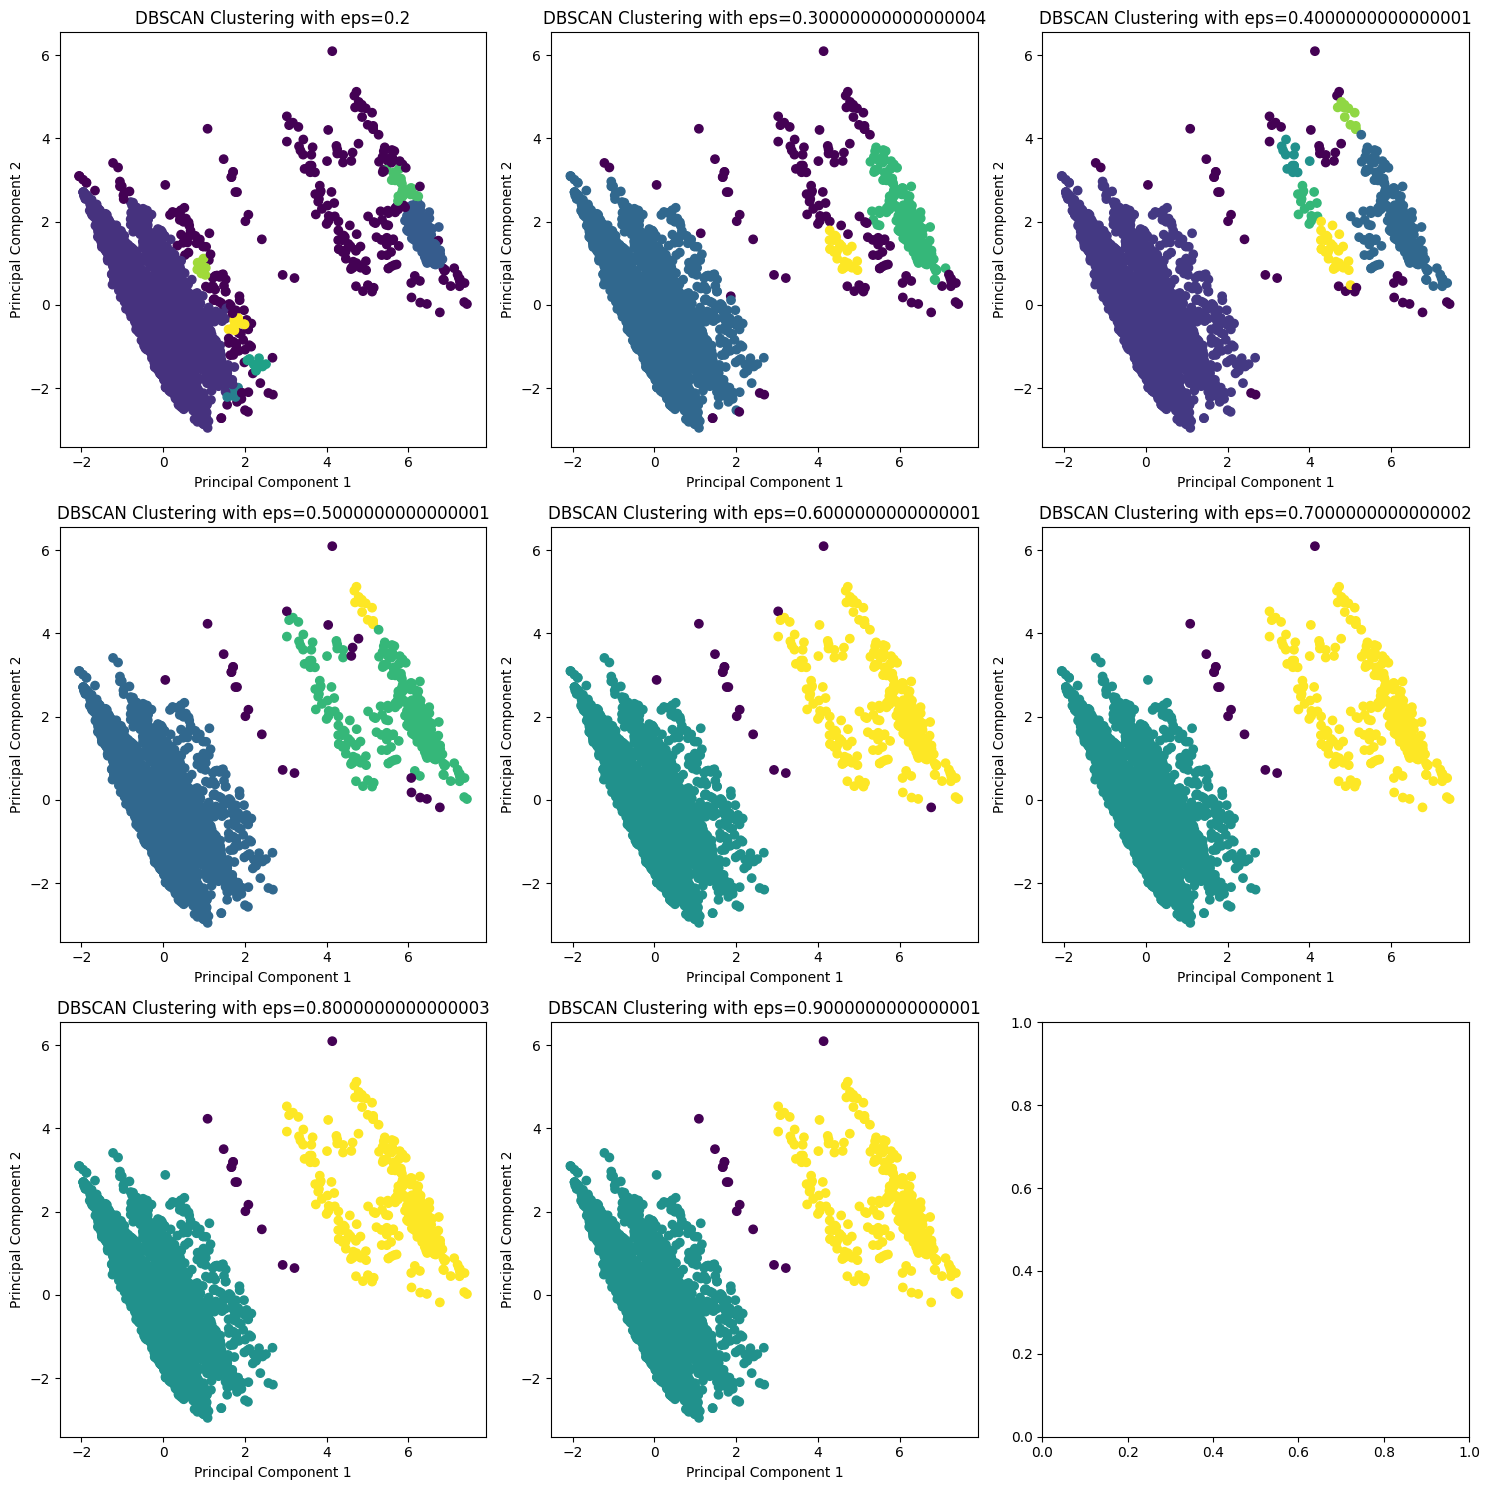

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, dbscan in enumerate(dbscan_models):
    row = i // 3
    col = i % 3
    scatter = axs[row, col].scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan.labels_, cmap='viridis')
    axs[row, col].set_title(f'DBSCAN Clustering with eps={eps_values[i]}')
    axs[row, col].set_xlabel('Principal Component 1')
    axs[row, col].set_ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Fitting the DBSCAN Model

Training DBCSAN with highest Silhoutte score

In [26]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(df_pca)
df['Cluster_DBSCAN'] = dbscan.labels_

In [27]:
df['Cluster_DBSCAN'].unique()

array([ 0,  1, -1,  2])

Priting Silhouette Score

In [28]:
silhouette_avg = silhouette_score(df_pca, dbscan.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.6725013703287542


Displaying Total Number of Clusters Made from it

In [29]:
labels = np.unique(df['Cluster_DBSCAN'])
num_clusters = len(labels)
clusters = labels[labels != -1]
num_clusters = len(clusters)
print("Number of clusters formed by DBSCAN (excluding noise points):", num_clusters)

Number of clusters formed by DBSCAN (excluding noise points): 3


Visualizing the 2D Graph of DBSCAN

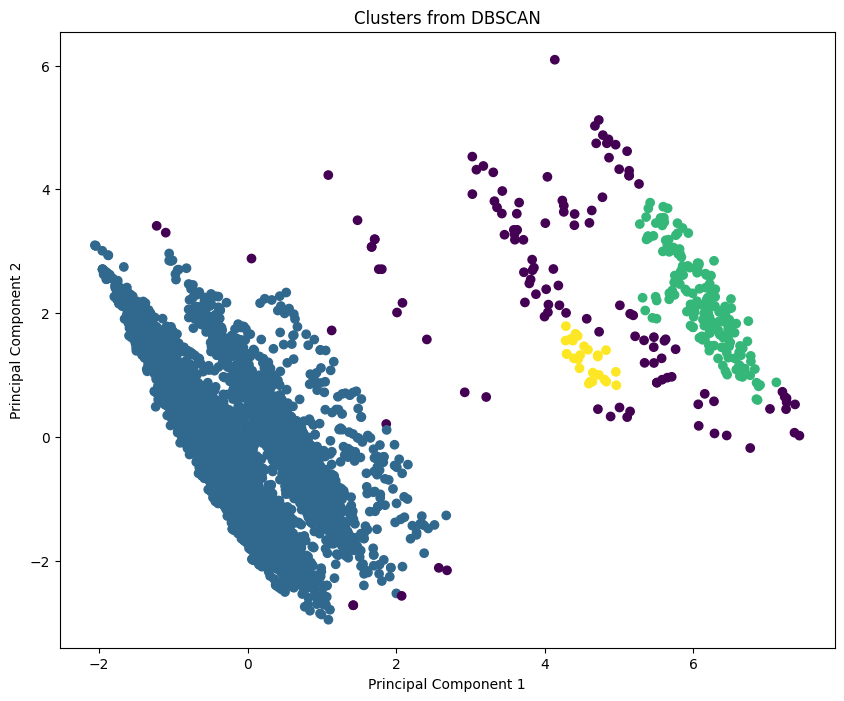

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster_DBSCAN'], cmap='viridis')
plt.title('Clusters from DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Making 3D Graph of the DBSCAN for better Visualization

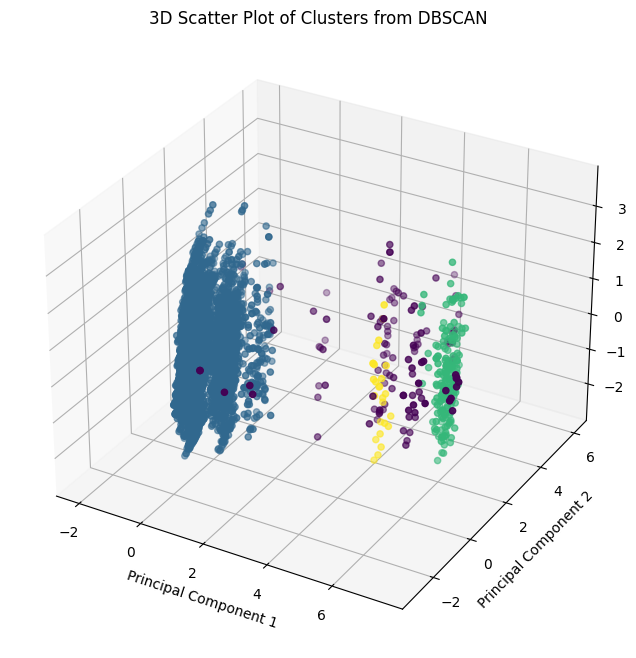

In [31]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Cluster_DBSCAN'], cmap='viridis')
ax.set_title('3D Scatter Plot of Clusters from DBSCAN')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()



---



---



# **Hierarchical Clusterig**

Finding Optimal number of Cluster for hierarchical Clustering

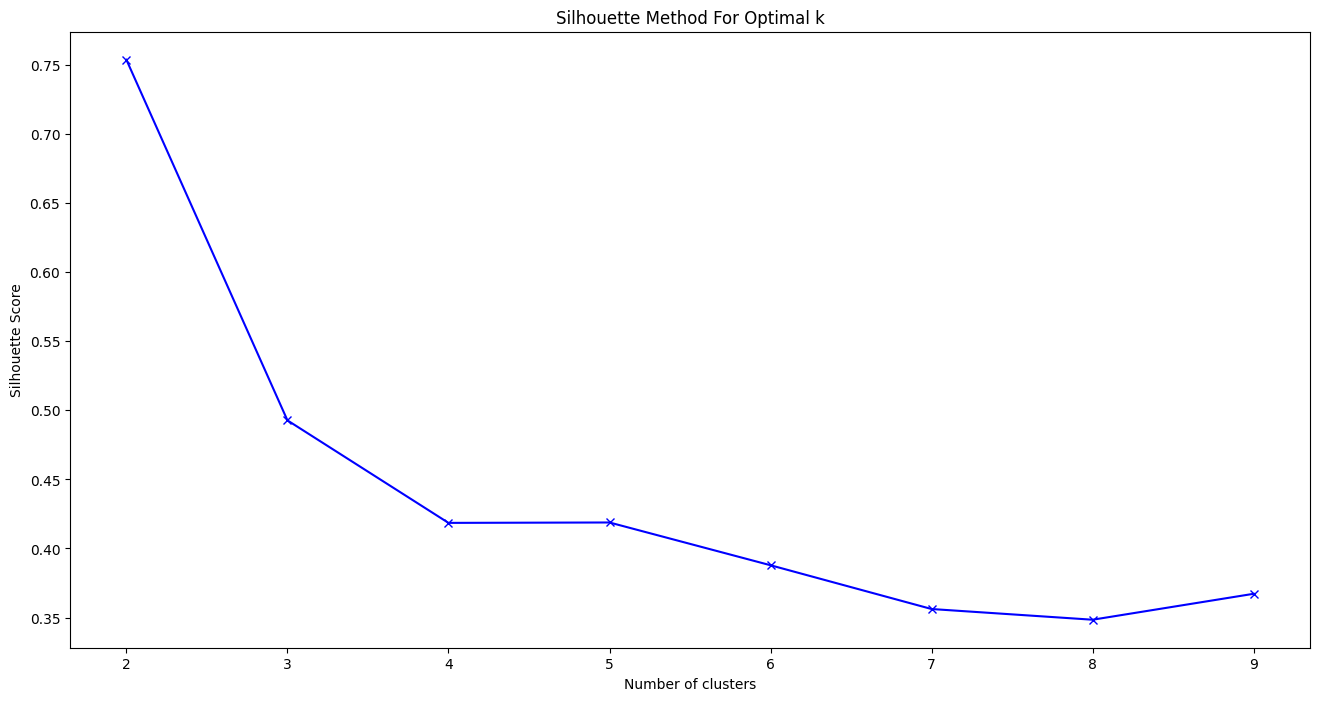

The best number of clusters is 2


In [32]:
sil = []
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']])
K = range(2, 10)
for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agg_clustering.fit_predict(df_pca)
    sil.append(silhouette_score(df_pca, labels, metric='euclidean'))
plt.figure(figsize=(16,8))
plt.plot(K, sil, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()
k_best = K[sil.index(max(sil))]
print(f"The best number of clusters is {k_best}")

Training on the rande of clusters from 2 to 5

In [33]:
n_clusters = range(2, 6)
agg_models = []
for n in n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    agg_clustering.fit(df_pca)
    agg_models.append(agg_clustering)

Printing all silhoutte score for each model

In [34]:
for i, agg_clustering in enumerate(agg_models):
    sil_score = silhouette_score(df_pca, agg_clustering.labels_)
    print(f'Silhouette Score with {n_clusters[i]} clusters: {sil_score}')

Silhouette Score with 2 clusters: 0.7539538019671105
Silhouette Score with 3 clusters: 0.4927774760386489
Silhouette Score with 4 clusters: 0.4185259206108408
Silhouette Score with 5 clusters: 0.4188150869876033


Visulizing 3d Graph for each of them

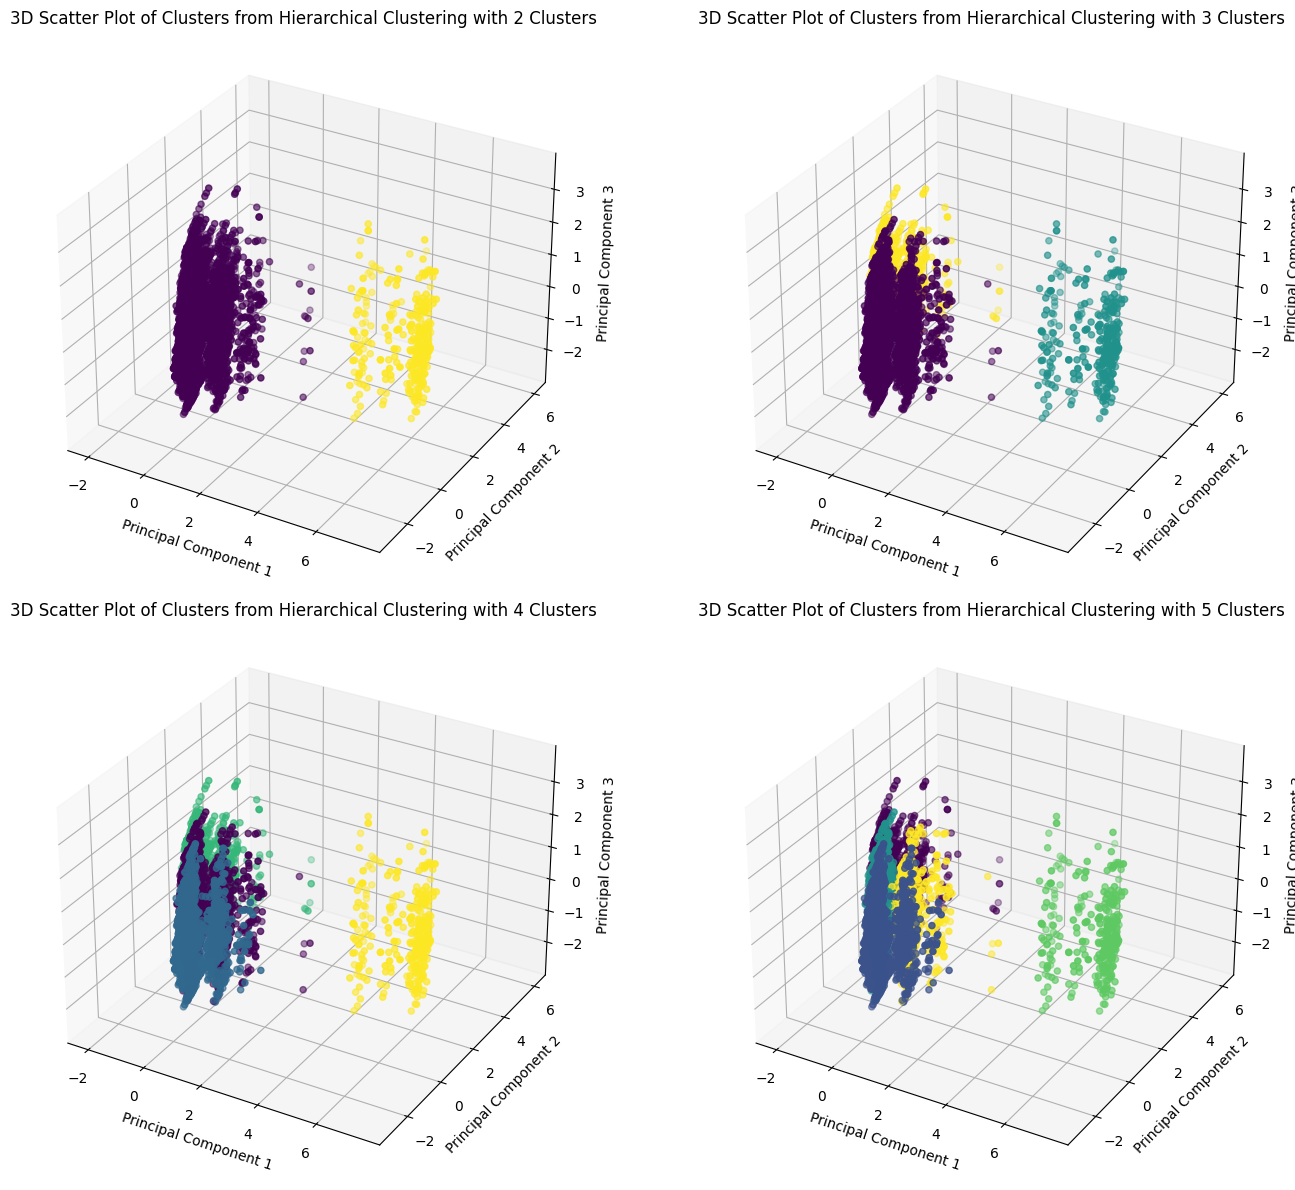

In [35]:
fig = plt.figure(figsize=(15, 12))
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[['Brand_encode', 'Product Name','Product ID','clean_reviews','Rating','sentiment_encoded']])
titles = ['2 Clusters', '3 Clusters', '4 Clusters', '5 Clusters']
for i, agg_clustering in enumerate(agg_models):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=agg_clustering.labels_, cmap='viridis')
    ax.set_title(f'3D Scatter Plot of Clusters from Hierarchical Clustering with {titles[i]}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
plt.tight_layout()
plt.show()

Training on the best cluster numbers

In [36]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
df['Cluster_Hierarchical'] = agg_clustering.fit_predict(df_pca)

Visualizing 3D Graph for the Clusters

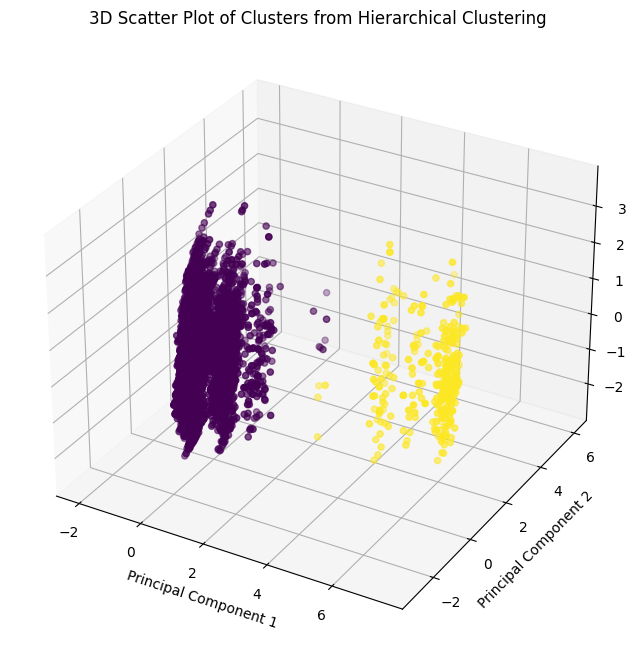

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Cluster_Hierarchical'], cmap='viridis')
ax.set_title('3D Scatter Plot of Clusters from Hierarchical Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Printing Silhouette Score

In [38]:
silhouette_avg_hierarchical = silhouette_score(df_pca, df['Cluster_Hierarchical'])
print("The average silhouette_score for hierarchical clustering is :", silhouette_avg_hierarchical)

The average silhouette_score for hierarchical clustering is : 0.6836807547291124
